In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn import preprocessing
from sklearn.ensemble import BaggingRegressor
import math, os, random 
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, make_scorer, mean_squared_error

In [2]:
# Plot the learning curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5), squeeze=False)

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    print("the shape of train_scores_mean", train_scores_mean.shape)
    print(train_scores_mean)
    print("the shape of test_scores_mean", test_scores_mean.shape)
    print(test_scores_mean)
    # Plot fit_time vs score
    # axes[0].grid()
    # axes[0].fill_between(fit_times_mean, train_scores_mean - train_scores_std,
    #                      train_scores_mean + train_scores_std, alpha=0.1,
    #                      color="r")
    # axes[0].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
    #                      test_scores_mean + test_scores_std, alpha=0.1,
    #                      color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Testing score")
    axes[0].legend(loc="best")

    return plt


In [3]:
# Load the train data and test data
def load_data():
    
    files = os.listdir("Data")
    filename = files[-1]
    train_data = pd.read_csv("./Data/{}".format(filename),header=None)
    train_output = train_data[len(train_data.columns)-1]
    train_num = train_data.shape[0]
    del train_data[len(train_data.columns)-1]

    file_list = files[:-1]
    test_data = pd.DataFrame()
    for filename in file_list:
        df = pd.read_csv("./Data/{}".format(filename),header=None)
        test_data = pd.concat([test_data, df], axis=0)
    test_output = test_data[len(test_data.columns)-1]
    del test_data[len(test_data.columns)-1]

    data_X = pd.concat([train_data, test_data], axis=0)
    data_Y = pd.concat([train_output, test_output], axis=0)

    return data_X, data_Y, train_num

In [4]:
#  define the models,which are baggings of MLP, KNN, RBF Network, Model Tree(M5P, REF), Linear Regression
def Models():
    # Initialize the models
    linear_reg = LinearRegression()

    regressors = [linear_reg]
    regressor_names = ["Linear Regression"]

    # Bagging of the models
    for index in range(len(regressors)):

        regEnsemble = BaggingRegressor(base_estimator=regressors[index], n_estimators=100, max_samples=1.0, max_features=100, oob_score=False, random_state=0)
        regressors[index] = regEnsemble
        regressor_names[index] += " Ensemble"


    return regressors, regressor_names


In [5]:
def main():
    fig, axes = plt.subplots(1, 1, figsize=(10, 15), squeeze=False)
    
    data_X, data_Y, train_num = load_data() 
    print(train_num, data_X.shape[0])
    train_indices = [list(range(0, train_num))]
    test_indices =  [list(range(train_num, data_X.shape[0]))]
    custom_cv = zip(train_indices, test_indices)
    estimators, estimator_names = Models()
    for estimator, estimator_name in zip(estimators, estimator_names):
        print("******" + estimator_name + "******")
        # plot_learning_curve(estimator=estimator, title=estimator_name, X=data_X, y=data_Y, axes=axes[:,0], cv=custom_cv, ylim=(-10.0, 1.0))
        plot_learning_curve(estimator=estimator, title=estimator_name, X=data_X, y=data_Y, axes=axes[:,0], cv=custom_cv, train_sizes=np.linspace(.1, float(train_num)/float(data_X.shape[0]), 30))

    plt.show()

52397 60021
******Linear Regression Ensemble******
the shape of train_scores_mean (30,)
[6.81811912e+14 2.75010548e+13 4.52190918e+10 1.41583160e+07
 2.27424132e+10 1.51379389e+10 2.31645506e+03 2.21584175e+03
 2.05036398e+03 1.07531414e+11 1.47586645e+11 1.21666963e+11
 1.70627998e+03 2.29149580e+13 5.57227899e+13 3.11233464e+13
 1.15787168e+13 1.19777638e+13 7.58189283e+12 8.95605966e+13
 1.08966769e+15 1.84485712e+14 7.71534848e+12 8.88378804e+11
 1.55252781e+11 7.98168173e+10 4.24190402e+14 5.17090021e+13
 3.81438482e+12 1.71221275e+12]
the shape of test_scores_mean (30,)
[1.80655666e+22 1.32293714e+22 7.12356074e+20 3.16006357e+19
 3.11926224e+14 2.32478925e+16 2.67688493e+15 5.47062525e+15
 3.49112640e+14 2.78060203e+14 6.15806427e+12 1.46964899e+15
 3.70418103e+14 1.10984825e+13 5.58040488e+12 2.64463095e+14
 1.97575416e+13 9.48813185e+14 5.88760832e+13 4.76315133e+12
 6.54311664e+02 6.38963358e+02 6.29093630e+02 6.25894009e+02
 6.59499753e+02 6.57727383e+02 6.57988081e+02 6.568

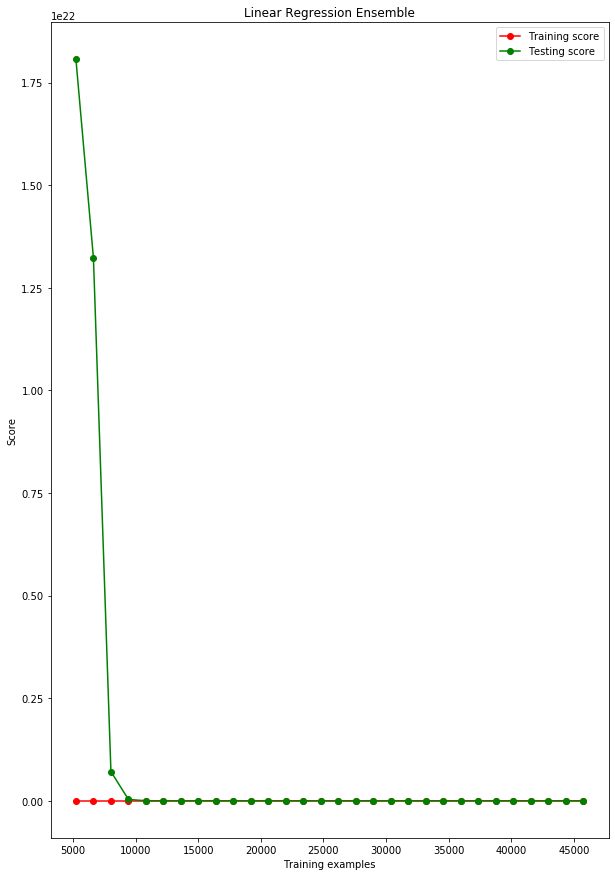

In [6]:
if __name__ == "__main__":
    main()

In [3]:
train_loss = [6.81811912e+14,2.75010548e+13,4.52190918e+10, 1.41583160e+07, 2.27424132e+10, 1.51379389e+10, 2.31645506e+03, 2.21584175e+03, 2.05036398e+03, 1.07531414e+11, 1.47586645e+11, 1.21666963e+11, 1.70627998e+03, 2.29149580e+13, 5.57227899e+13, 3.11233464e+13, 1.15787168e+13, 1.19777638e+13, 7.58189283e+12, 8.95605966e+13, 1.08966769e+15, 1.84485712e+14, 7.71534848e+12, 8.88378804e+11, 1.55252781e+11, 7.98168173e+10, 4.24190402e+14, 5.17090021e+13, 3.81438482e+12, 1.71221275e+12]

In [4]:
test_loss = [1.80655666e+22, 1.32293714e+22, 7.12356074e+20, 3.16006357e+19,3.11926224e+14, 2.32478925e+16, 2.67688493e+15, 5.47062525e+15,3.49112640e+14,2.78060203e+14,6.15806427e+12,1.46964899e+15,3.70418103e+14, 1.10984825e+13, 5.58040488e+12, 2.64463095e+14,1.97575416e+13, 9.48813185e+14, 5.88760832e+13, 4.76315133e+12,6.54311664e+02, 6.38963358e+02, 6.29093630e+02,6.25894009e+02,6.59499753e+02, 6.57727383e+02, 6.57988081e+02, 6.56877730e+02,6.54914532e+02,6.55815162e+02]

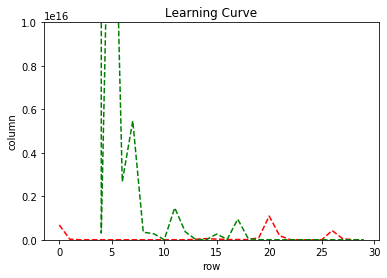

In [6]:

l1=plt.plot(train_loss,'r--',label='Train Loss')
l2=plt.plot(test_loss,'g--',label='Test Loss')

plt.title('Learning Curve')
plt.xlabel('row')
plt.ylabel('column')

plt.ylim(-1, 1e+16)

# plt.legend()
# plt.show()
plt.savefig("./test.png")

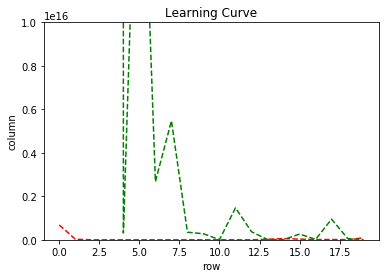

In [7]:

l1=plt.plot(train_loss[:20],'r--',label='Train Loss')
l2=plt.plot(test_loss[:20],'g--',label='Test Loss')

plt.title('Learning Curve')
plt.xlabel('row')
plt.ylabel('column')

plt.ylim(-1, 1e+16)

# plt.legend()
# plt.show()
plt.savefig("./test1.png")